# 이미지 세그멘테이션(Image Segmentation)

- 이미지에서 픽셀 단위로 객체를 추출하는 방법.
- 이미지에서 객체가 있는 위치, 해당 객체의 모양, 어떤 픽셀이 어떤 객체에 속하는지 등을 알고 싶다고 가정할 때, 이미지를 분할해 이미지의 각 픽셀에 레이블을 부여


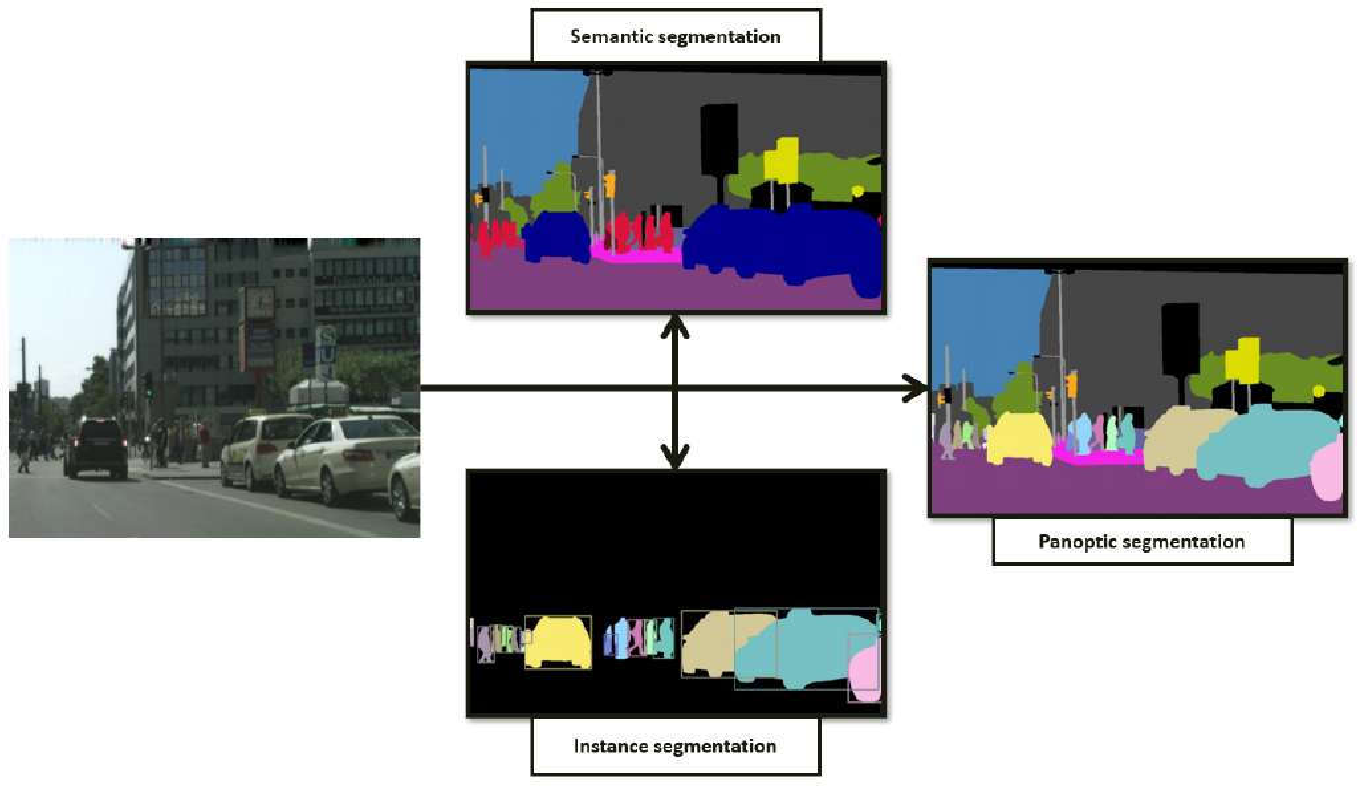

- sementic segmentation
  - 실제로 인식할 수 있는 물리적 의미 단위로 인식하는 세그멘테이션을 시멘틱 세그멘테이션(sementic segmentation)이라고 한다.
  - 세부적으로는 모든 픽셀의 레이블을 예측하는 Dense Prediction이라고 부른다.

- Instance Segmentation
 - 객체 자체를 추출한다.

## Mask R-CNN의 발전 과정

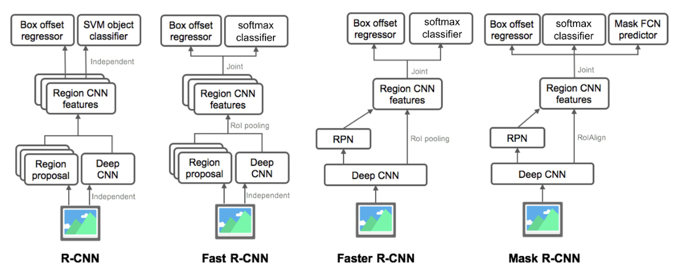

* R-CNN: https://arxiv.org/abs/1311.2524
  - 객체 탐지에 사용된 초기 모델
  - 주요 객체들을 바운딩 박스로 표현하여 정확히 식별하는게 목표
  - AlexNet을 개량한 CNN 모델을 이용하고, 마지막 층에 SVM을 통해 객체 분류


* Fast R-CNN: https://arxiv.org/abs/1504.08083
  - R-CNN의 단점인 느린 속도를 빠른 속도로 개선
  - ROI(Region of Interest) 풀링을 통해 한 이미지의 subregion에 대한 forward pass 값을 공유
  - R-CNN은 CNN 모델로 image feature를 추출, SVM 모델로 분류, Regressor 모델로 bounding box를 맞추는 작업으로 분류되어 있지만, Fast R-CNN은 하나의 모델로 동작
  - Top layer에 softmax layer를 둬서 CNN 결과를 class로 출력
  - Box regression layer를 softmax layer에 평행하게 두어 bounding box 좌표를 출력

* Faster R-CNN: https://arxiv.org/abs/1506.01497
  - Fast R-CNN은 가능성 있는 다양한 bounding box들, 즉 ROI를 생성하는 과정인 selective search가 느려 region proposer에서 병목이 발생
  - 이미지 분류(classification)의 첫 단계인 CNN의 forward pass를 통해 얻어진 feature들을 기반으로 영역을 제안
  - CNN 결과를 selective search 알고리즘 대신 region proposal에 이용

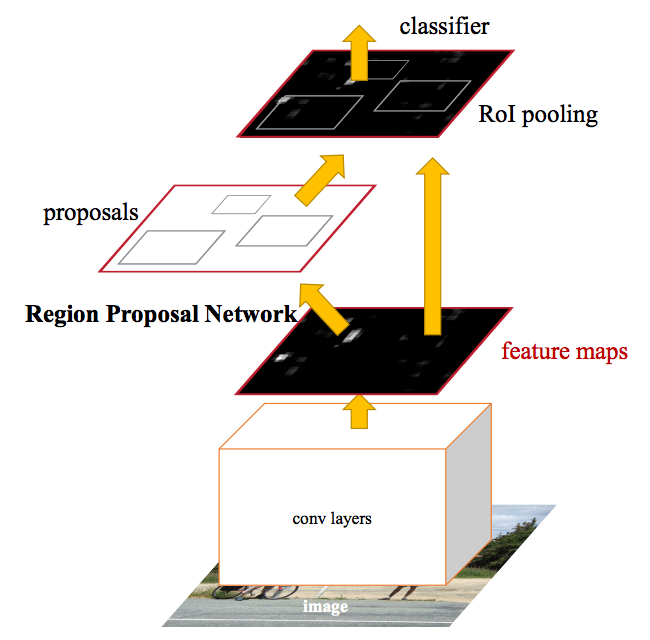

  - k개의 일반적인 비율을 지닌 anchor box를 이용하여 하나의 bounding box 및 score를 이미지의 위치별로 출력

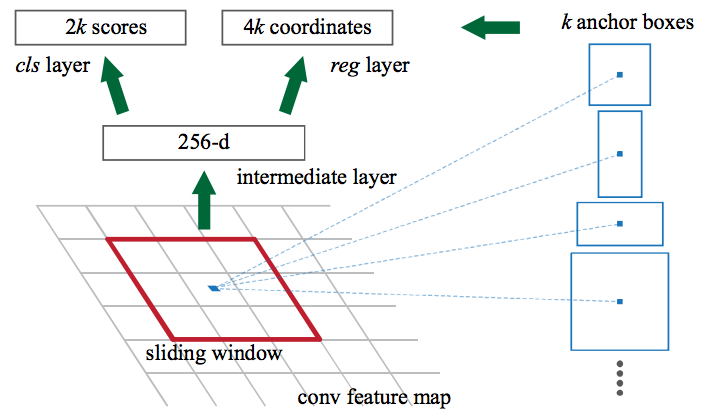

# Mask R-CNN

- 객체 탐지 모델으로부터 시작

  - 예측된 경계 상자가 정확하면 분할 네트워크가 할 일은 단순

  - 해당 패치에서 어느 픽셀이 캡처된 클래스에 속하는지, 어느 픽셀이 배경의 일부이고 어느 픽셀이 다른 클래스에 속하는지 분류

- 사전 훈련된 탐지 네트워크와 뒤에 사전 훈련된 분할 네트워크를 하나로 이어서 End-to-End 방식으로 훈련하여 전체 파이프라인의 성능이 좋아짐을 보임

- Faster R-CNN에 기반

  - 참고 
    - https://curt-park.github.io/2017-03-17/faster-rcnn/ 

    - https://tensorflow.blog/2017/06/05/from-r-cnn-to-mask-r-cnn/

- 2-stage 기법

  - 첫 번째 stage는 RPN에서 RoI를 생성
  - 두 번째 stage는 생성한 RoI를 이용하여 class, boxx offset, binary mask를 출력
Pixel 레벨의 세그멘테이션

- RolPool에서 선택된 feature map이 원래 이미지 영역으로 약간 잘못된 정렬이 발생한 부분을 RolAlign을 통해 조정하여 정확하게 정렬

- Mask R-CNN은 Mask가 생성되면, Faster R-CNN으로 생성된 classification과 bounding box들을 합쳐 정확한 세그멘테이션 가능



  PAPER: https://arxiv.org/abs/1703.06870
  
  Mask-Rcnn [github](https://github.com/matterport/Mask_RCNN)

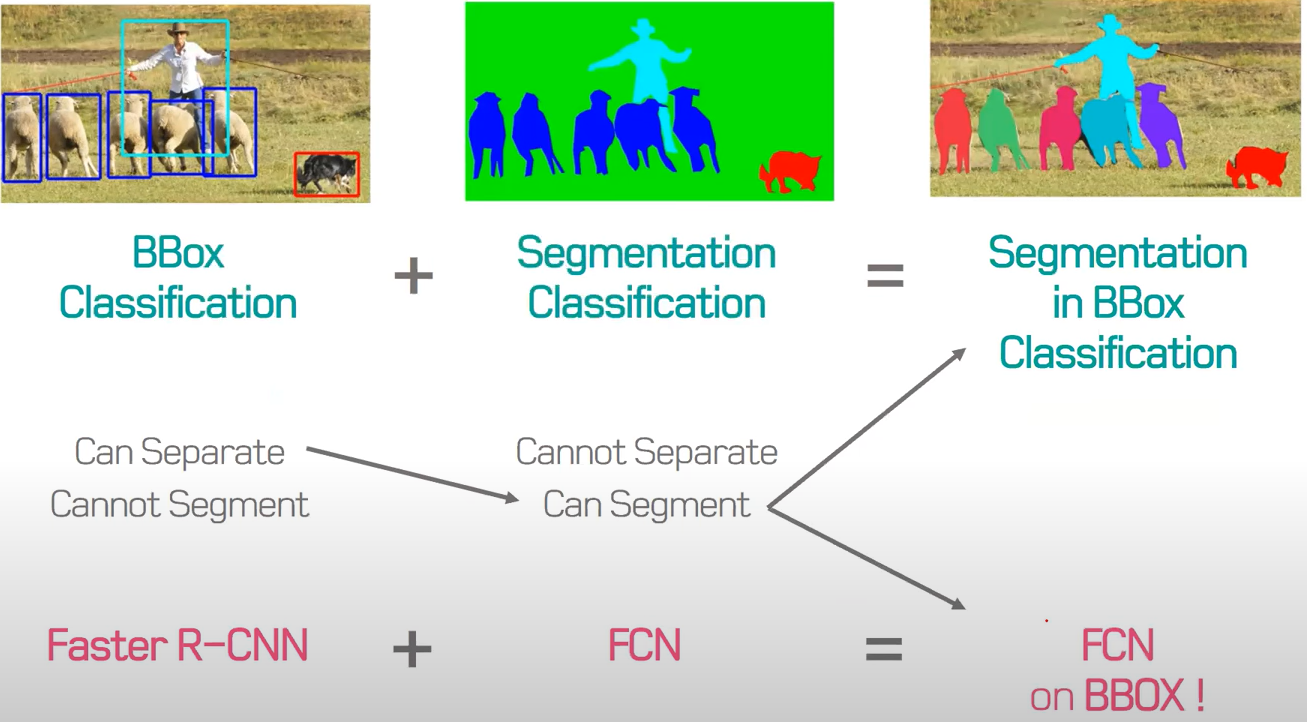

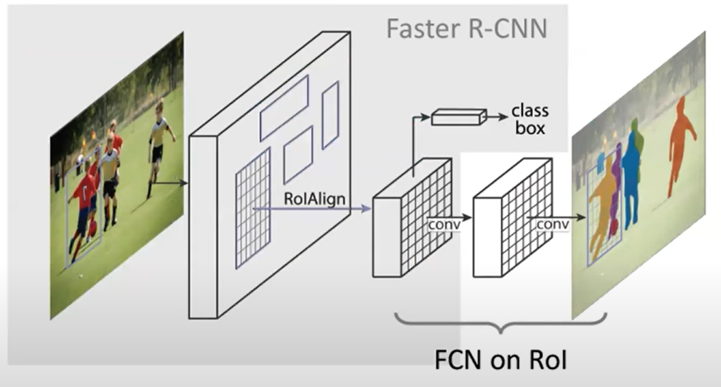

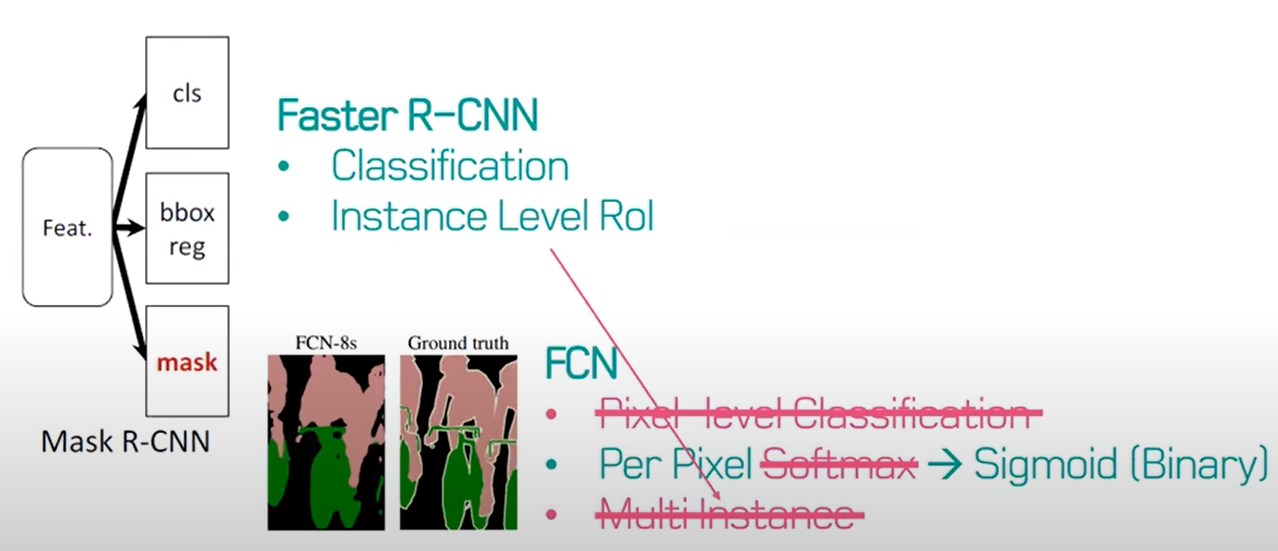

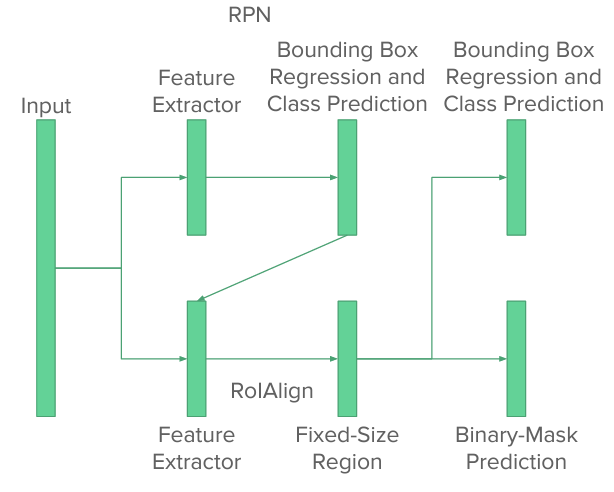

# MaskRCNN Microcontroller Segmentation

## Install Matterport Mask-RCNN in Google Colab

In [ ]:
# https://stackoverflow.com/questions/53740577/does-any-one-got-attributeerror-str-object-has-no-attribute-decode-whi
!pip3 install 'h5py==2.10.0' --force-reinstall

In [ ]:
# %tensorflow_version 1.x
!pip install tensorboard==1.15.0 tensorflow==1.15.0 tensorflow-estimator==1.15.1 tensorflow-gpu==1.15.2 tensorflow-gpu-estimator==2.1.0 Keras==2.2.5 Keras-Applications==1.0.8 Keras-Preprocessing==1.1.0

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN
%cd Mask_RCNN

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 137.67 MiB | 38.67 MiB/s, done.
Resolving deltas: 100% (558/558), done.
/content/Mask_RCNN


In [ ]:
# https://github.com/matterport/Mask_RCNN/issues/1754#issuecomment-776493501

with open('mrcnn/model.py') as f:
    model_file = f.read()

with open('mrcnn/model.py', 'w') as f:
    model_file = model_file.replace("self.keras_model = self.build(mode=mode, config=config)",
                                    "self.keras_model = self.build(mode=mode, config=config)\n        self.keras_model.metrics_tensors = []")
    f.write(model_file)

In [ ]:
!pip3 install -r requirements.txt
!python3 setup.py install

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cd ../../

## Imports

In [ ]:
import os
import sys
import random
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import json

# Root directory of the project
ROOT_DIR = os.path.abspath("/content/drive/MyDrive/Colab Notebooks/Mask_RCNN/")

print(ROOT_DIR)

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn.config import Config
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

/content/drive/MyDrive/Colab Notebooks/Mask_RCNN


## Configurations

In [ ]:
class MicrocontrollerConfig(Config):
    # Give the configuration a recognizable name
    NAME = "microcontroller_segmentation"
    
    NUM_CLASSES = 1 + 4

    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

    STEPS_PER_EPOCH = 5

config = MicrocontrollerConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                17
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Dataset

In [ ]:
!wget https://github.com/TannerGilbert/Detectron2-Train-a-Instance-Segmentation-Model/raw/master/microcontroller_segmentation_data.zip
!unzip microcontroller_segmentation_data.zip

In [ ]:
class MicrocontrollerDataset(utils.Dataset):
    def load_dataset(self, dataset_dir):
        self.add_class('dataset', 1, 'Raspberry_Pi_3')
        self.add_class('dataset', 2, 'Arduino_Nano')
        self.add_class('dataset', 3, 'ESP8266')
        self.add_class('dataset', 4, 'Heltec_ESP32_Lora')
        
        # find all images
        for i, filename in enumerate(os.listdir(dataset_dir)):
            if '.jpg' in filename:
                self.add_image('dataset', 
                               image_id=i, 
                               path=os.path.join(dataset_dir, filename), 
                               annotation=os.path.join(dataset_dir, filename.replace('.jpg', '.json')))
    
    def extract_masks(self, filename):
        json_file = os.path.join(filename)
        with open(json_file) as f:
            img_anns = json.load(f)
            
        masks = np.zeros([600, 800, len(img_anns['shapes'])], dtype='uint8')
        classes = []
        for i, anno in enumerate(img_anns['shapes']):
            mask = np.zeros([600, 800], dtype=np.uint8)
            cv2.fillPoly(mask, np.array([anno['points']], dtype=np.int32), 1)
            masks[:, :, i] = mask
            classes.append(self.class_names.index(anno['label']))
        return masks, classes
 
    # load the masks for an image
    def load_mask(self, image_id):
        # get details of image
        info = self.image_info[image_id]
        # define box file location
        path = info['annotation']
        # load XML
        masks, classes = self.extract_masks(path)
        return masks, np.asarray(classes, dtype='int32')
    
    def image_reference(self, image_id):
        info = self.image_info[image_id]
        return info['path']

In [ ]:
# Create training and validation set
# train set
dataset_train = MicrocontrollerDataset()
dataset_train.load_dataset('/content/drive/MyDrive/Colab Notebooks/Mask_RCNN/Microcontroller Detection/train')
dataset_train.prepare()
print('Train: %d' % len(dataset_train.image_ids))
 
# test/val set
dataset_val = MicrocontrollerDataset()
dataset_val.load_dataset('/content/drive/MyDrive/Colab Notebooks/Mask_RCNN/Microcontroller Detection/test')
dataset_val.prepare()
print('Test: %d' % len(dataset_val.image_ids))

Train: 142
Test: 7


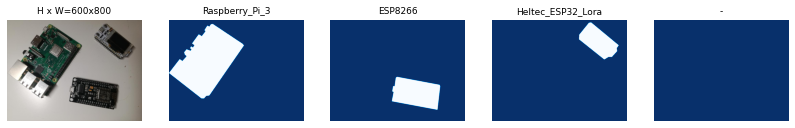

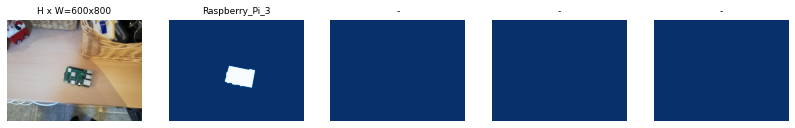

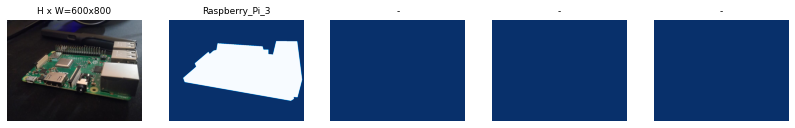

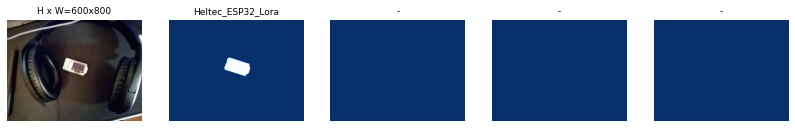

In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset_train.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

## Create Model

In [ ]:
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

In [ ]:
# Which weights to start with?
init_with = "coco"  # imagenet, coco, or last

if init_with == "imagenet":
    model.load_weights(model.get_imagenet_weights(), by_name=True)
elif init_with == "coco":
    # Load weights trained on MS COCO, but skip layers that
    # are different due to the different number of classes
    # See README for instructions to download the COCO weights
    model.load_weights(COCO_MODEL_PATH, by_name=True,
                       exclude=["mrcnn_class_logits", "mrcnn_bbox_fc", 
                                "mrcnn_bbox", "mrcnn_mask"])
elif init_with == "last":
    # Load the last model you trained and continue training
    model.load_weights(model.find_last(), by_name=True)


## Training

In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.

### heads
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=5, 
            layers='heads')

# # Fine tune all layers
# # Passing layers="all" trains all layers. You can also 
# # pass a regular expression to select which layers to
# # train by name pattern.

# model.train(dataset_train, dataset_val, 
#             learning_rate=config.LEARNING_RATE / 10,
#             epochs=10, 
#             layers="all")


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/drive/MyDrive/Colab Notebooks/Mask_RCNN/logs/microcontroller_segmentation20221108T0432/mask_rcnn_microcontroller_segmentation_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2      


/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


/usr/local/lib/python3.7/dist-packages/keras/engine/training_generator.py:49: UserWarning: Using a generator with `use_mu

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

1/5 [=====>........................] - ETA: 6:02 - loss: 3.6720 - rpn_class_loss: 1.8509e-04 - rpn_bbox_loss: 0.0805 - mrcnn_class_loss: 0.9224 - mrcnn_bbox_loss: 1.2065 - mrcnn_mask_loss: 1.4625

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


2/5 [===========>..................] - ETA: 3:22 - loss: 3.3494 - rpn_class_loss: 1.8551e-04 - rpn_bbox_loss: 0.0796 - mrcnn_class_loss: 0.7362 - mrcnn_bbox_loss: 1.0970 - mrcnn_mask_loss: 1.4365

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


3/5 [=================>............] - ETA: 1:59 - loss: 3.0552 - rpn_class_loss: 2.7904e-04 - rpn_bbox_loss: 0.0582 - mrcnn_class_loss: 0.5669 - mrcnn_bbox_loss: 1.0661 - mrcnn_mask_loss: 1.3637

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


4/5 [=======================>......] - ETA: 55s - loss: 2.8152 - rpn_class_loss: 3.2862e-04 - rpn_bbox_loss: 0.0474 - mrcnn_class_loss: 0.4614 - mrcnn_bbox_loss: 1.0056 - mrcnn_mask_loss: 1.3005 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

5/5 [==============================] - 956s 191s/step - loss: 2.7659 - rpn_class_loss: 4.2868e-04 - rpn_bbox_loss: 0.0443 - mrcnn_class_loss: 0.4558 - mrcnn_bbox_loss: 1.1519 - mrcnn_mask_loss: 1.1134 - val_loss: 3.7043 - val_rpn_class_loss: 0.0029 - val_rpn_bbox_loss: 0.1760 - val_mrcnn_class_loss: 0.1690 - val_mrcnn_bbox_loss: 1.2277 - val_mrcnn_mask_loss: 2.1287


Epoch 2/5


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


1/5 [=====>........................] - ETA: 2:53 - loss: 2.2605 - rpn_class_loss: 8.5497e-04 - rpn_bbox_loss: 0.0300 - mrcnn_class_loss: 0.4016 - mrcnn_bbox_loss: 1.4658 - mrcnn_mask_loss: 0.3623

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


2/5 [===========>..................] - ETA: 2:09 - loss: 2.2794 - rpn_class_loss: 0.0014 - rpn_bbox_loss: 0.0360 - mrcnn_class_loss: 0.3983 - mrcnn_bbox_loss: 1.2862 - mrcnn_mask_loss: 0.5576    

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


3/5 [=================>............] - ETA: 1:25 - loss: 2.1696 - rpn_class_loss: 0.0015 - rpn_bbox_loss: 0.0376 - mrcnn_class_loss: 0.3770 - mrcnn_bbox_loss: 1.1449 - mrcnn_mask_loss: 0.6084

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


4/5 [=======================>......] - ETA: 42s - loss: 2.4307 - rpn_class_loss: 0.0068 - rpn_bbox_loss: 0.0648 - mrcnn_class_loss: 0.2891 - mrcnn_bbox_loss: 1.1091 - mrcnn_mask_loss: 0.9608 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

5/5 [==============================] - 898s 180s/step - loss: 2.5175 - rpn_class_loss: 0.0100 - rpn_bbox_loss: 0.0799 - mrcnn_class_loss: 0.2371 - mrcnn_bbox_loss: 1.0532 - mrcnn_mask_loss: 1.1374 - val_loss: 3.8023 - val_rpn_class_loss: 0.0023 - val_rpn_bbox_loss: 0.1429 - val_mrcnn_class_loss: 0.1332 - val_mrcnn_bbox_loss: 1.2387 - val_mrcnn_mask_loss: 2.2851
Epoch 3/5


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


1/5 [=====>........................] - ETA: 2:53 - loss: 2.6275 - rpn_class_loss: 3.5381e-04 - rpn_bbox_loss: 0.0711 - mrcnn_class_loss: 0.1211 - mrcnn_bbox_loss: 0.9417 - mrcnn_mask_loss: 1.4933

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


2/5 [===========>..................] - ETA: 2:07 - loss: 2.3901 - rpn_class_loss: 3.5354e-04 - rpn_bbox_loss: 0.0688 - mrcnn_class_loss: 0.1201 - mrcnn_bbox_loss: 0.8165 - mrcnn_mask_loss: 1.3844

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


3/5 [=================>............] - ETA: 1:25 - loss: 2.2698 - rpn_class_loss: 9.6847e-04 - rpn_bbox_loss: 0.0497 - mrcnn_class_loss: 0.0987 - mrcnn_bbox_loss: 0.8922 - mrcnn_mask_loss: 1.2282

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


4/5 [=======================>......] - ETA: 42s - loss: 2.0374 - rpn_class_loss: 0.0013 - rpn_bbox_loss: 0.0402 - mrcnn_class_loss: 0.0884 - mrcnn_bbox_loss: 0.7953 - mrcnn_mask_loss: 1.1123     

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

5/5 [==============================] - 894s 179s/step - loss: 1.9277 - rpn_class_loss: 0.0023 - rpn_bbox_loss: 0.0351 - mrcnn_class_loss: 0.0854 - mrcnn_bbox_loss: 0.7698 - mrcnn_mask_loss: 1.0350 - val_loss: 2.9248 - val_rpn_class_loss: 0.0020 - val_rpn_bbox_loss: 0.1558 - val_mrcnn_class_loss: 0.1204 - val_mrcnn_bbox_loss: 1.1781 - val_mrcnn_mask_loss: 1.4686
Epoch 4/5


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


1/5 [=====>........................] - ETA: 2:52 - loss: 1.3506 - rpn_class_loss: 0.0065 - rpn_bbox_loss: 0.0144 - mrcnn_class_loss: 0.0597 - mrcnn_bbox_loss: 0.6293 - mrcnn_mask_loss: 0.6406

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


2/5 [===========>..................] - ETA: 2:08 - loss: 1.8472 - rpn_class_loss: 0.0059 - rpn_bbox_loss: 0.0554 - mrcnn_class_loss: 0.1163 - mrcnn_bbox_loss: 1.1472 - mrcnn_mask_loss: 0.5224

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


3/5 [=================>............] - ETA: 1:26 - loss: 1.9868 - rpn_class_loss: 0.0057 - rpn_bbox_loss: 0.0670 - mrcnn_class_loss: 0.1418 - mrcnn_bbox_loss: 1.2910 - mrcnn_mask_loss: 0.4812

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


4/5 [=======================>......] - ETA: 43s - loss: 2.4172 - rpn_class_loss: 0.0043 - rpn_bbox_loss: 0.0563 - mrcnn_class_loss: 0.1618 - mrcnn_bbox_loss: 1.2543 - mrcnn_mask_loss: 0.9405 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

5/5 [==============================] - 905s 181s/step - loss: 2.5503 - rpn_class_loss: 0.0035 - rpn_bbox_loss: 0.0497 - mrcnn_class_loss: 0.1679 - mrcnn_bbox_loss: 1.1831 - mrcnn_mask_loss: 1.1462 - val_loss: 2.5667 - val_rpn_class_loss: 0.0028 - val_rpn_bbox_loss: 0.1395 - val_mrcnn_class_loss: 0.1123 - val_mrcnn_bbox_loss: 1.2666 - val_mrcnn_mask_loss: 1.0454
Epoch 5/5


/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


1/5 [=====>........................] - ETA: 2:51 - loss: 1.8633 - rpn_class_loss: 0.0180 - rpn_bbox_loss: 0.0182 - mrcnn_class_loss: 0.0198 - mrcnn_bbox_loss: 0.8382 - mrcnn_mask_loss: 0.9691

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


2/5 [===========>..................] - ETA: 2:07 - loss: 1.6198 - rpn_class_loss: 0.0179 - rpn_bbox_loss: 0.0197 - mrcnn_class_loss: 0.0194 - mrcnn_bbox_loss: 0.6495 - mrcnn_mask_loss: 0.9133

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


3/5 [=================>............] - ETA: 1:25 - loss: 1.7587 - rpn_class_loss: 0.0143 - rpn_bbox_loss: 0.0556 - mrcnn_class_loss: 0.1061 - mrcnn_bbox_loss: 0.8186 - mrcnn_mask_loss: 0.7641

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)


4/5 [=======================>......] - ETA: 42s - loss: 1.7627 - rpn_class_loss: 0.0124 - rpn_bbox_loss: 0.0726 - mrcnn_class_loss: 0.1412 - mrcnn_bbox_loss: 0.8457 - mrcnn_mask_loss: 0.6908 

/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. Starting from version 0.19 a ValueError will be raised instead of this warning.
  order = _validate_interpolation_order(image.dtype, order)
/usr/local/lib/python3.7/dist-packages/skimage/transform/_warps.py:830: FutureWarning: Input image dtype is bool. Interpolation is not defined with bool data type. Please set order to 0 or explicitely cast input image to another data type. 

5/5 [==============================] - 911s 182s/step - loss: 1.8546 - rpn_class_loss: 0.0100 - rpn_bbox_loss: 0.0741 - mrcnn_class_loss: 0.1282 - mrcnn_bbox_loss: 1.0064 - mrcnn_mask_loss: 0.6360 - val_loss: 2.0389 - val_rpn_class_loss: 0.0027 - val_rpn_bbox_loss: 0.1595 - val_mrcnn_class_loss: 0.0764 - val_mrcnn_bbox_loss: 1.1343 - val_mrcnn_mask_loss: 0.6660


## Detection

In [ ]:
class InferenceConfig(MicrocontrollerConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
# model_path = os.path.join(ROOT_DIR, ".h5 file name here")
model_path = os.path.join(ROOT_DIR, "logs/microcontroller_segmentation20221108T0432/mask_rcnn_microcontroller_segmentation_0005.h5")

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Loading weights from  /content/drive/MyDrive/Colab Notebooks/Mask_RCNN/logs/microcontroller_segmentation20221108T0432/mask_rcnn_microcontroller_segmentation_0005.h5
Re-starting from epoch 5


In [ ]:
def get_ax(rows=1, cols=1, size=8):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Change the default size attribute to control the size
    of rendered images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

original_image           shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
image_meta               shape: (17,)                 min:    0.00000  max: 1024.00000  float64
gt_class_id              shape: (1,)                  min:    2.00000  max:    2.00000  int32
gt_bbox                  shape: (1, 4)                min:  247.00000  max:  791.00000  int32
gt_mask                  shape: (1024, 1024, 1)       min:    0.00000  max:    1.00000  uint8


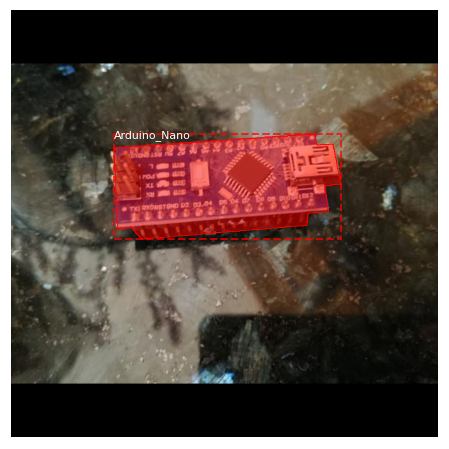

In [ ]:
# Test on a random image
image_id = random.choice(dataset_val.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_val, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 17)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



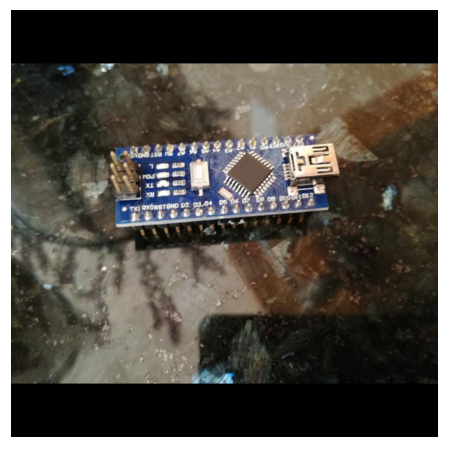

In [ ]:
results = model.detect([original_image], verbose=1)

r = results[0]
visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'], 
                            dataset_val.class_names, r['scores'], ax=get_ax())

## Evaluation

In [ ]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = dataset_val.image_ids
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_val, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        utils.compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
print("mAP: ", np.mean(APs))

mAP:  0.0
